# Email Marketing Campaign Success Prediction

## 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import streamlit as st
import pickle

## 2. Loading and Exploring the Dataset

In [ ]:
# Load dataset
df = pd.read_excel("C:/Users/keert/OneDrive/Desktop/EXCELR/project/Email_Marketing_Campaign_Dataset_Rounded.xlsx")


# Display the first few rows of the dataset
print(df.head())

# Basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Statistical summary
print(df.describe())


   Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0            39              7               1             546.1   
1            33              6               1            1069.8   
2            41              5               1            1293.2   
3            50              3               1            2443.8   
4            32              6               0            1778.3   

   Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                    3.3                    23                       53.3   
1                    4.9                    23                       60.5   
2                    5.0                     3                       55.9   
3                    5.9                    25                       61.8   
4                    2.3                    40                       66.8   

   Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
0                       0                        1            

## 3. EDA (Exploratory Data Analysis)

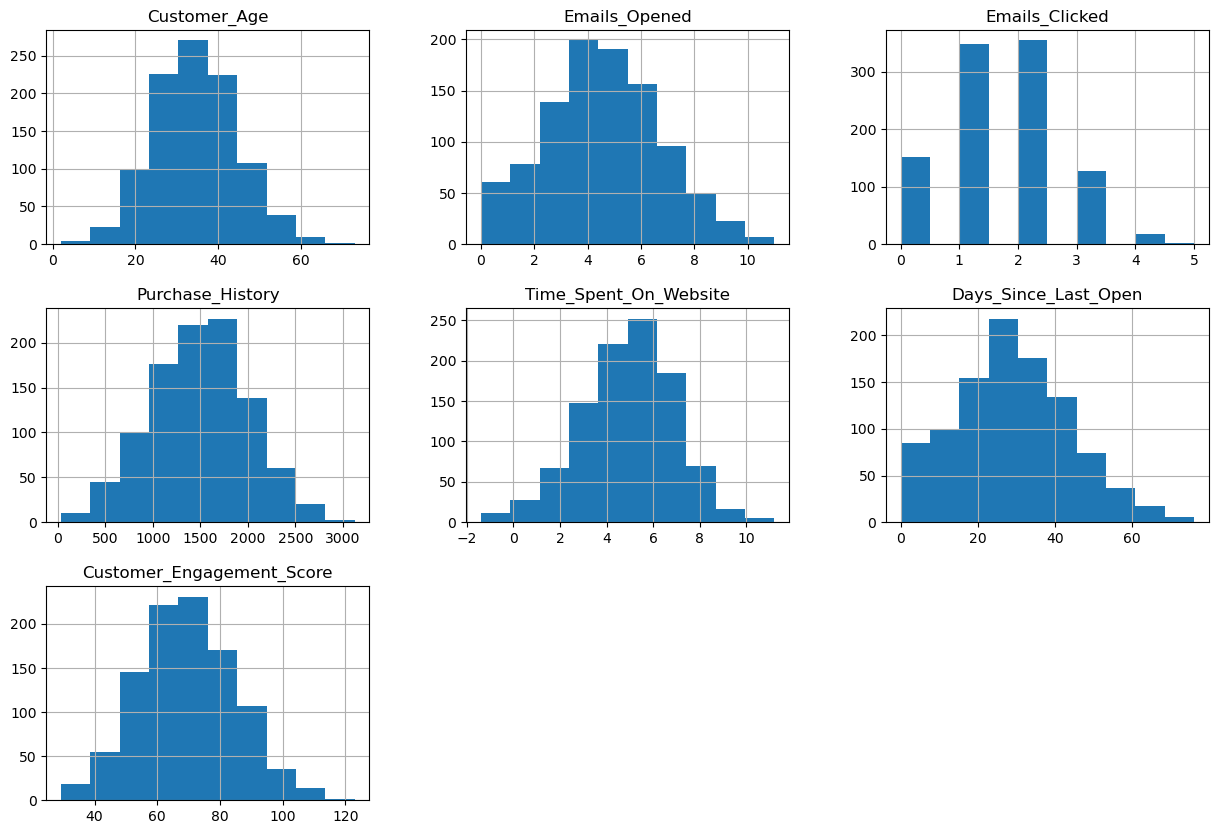

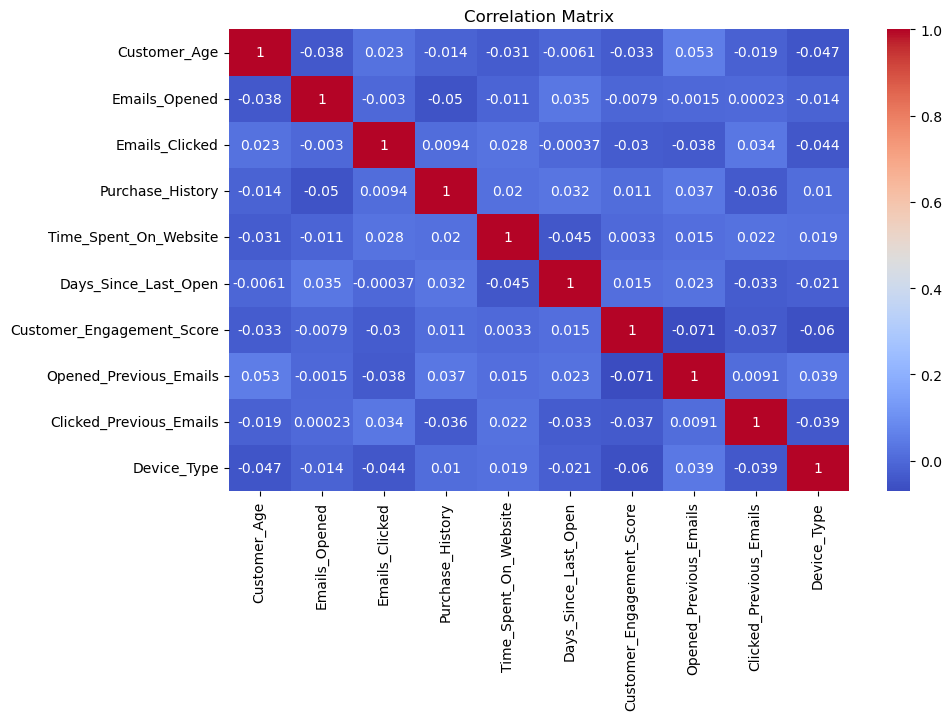

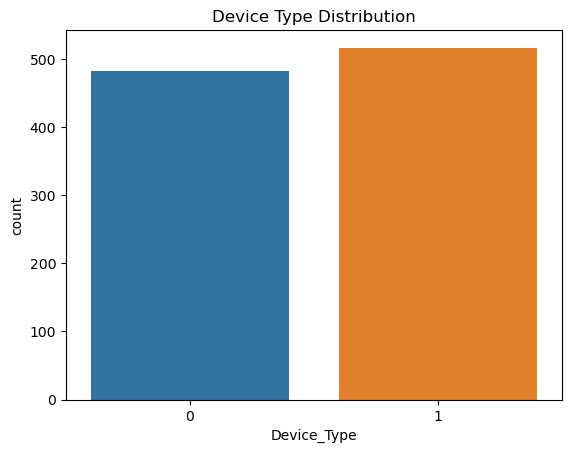

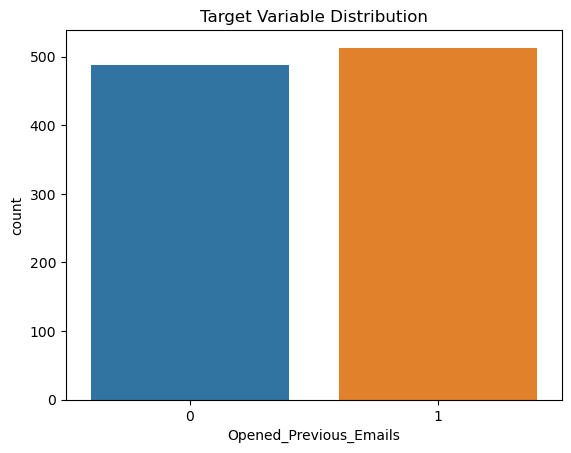

In [ ]:
# Plot histograms for numerical features
numerical_columns = ['Customer_Age', 'Emails_Opened', 'Emails_Clicked', 'Purchase_History', 'Time_Spent_On_Website', 'Days_Since_Last_Open', 'Customer_Engagement_Score']

df[numerical_columns].hist(bins=10, figsize=(15,10))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Bar plot for binary features
sns.countplot(data=df, x='Device_Type')
plt.title('Device Type Distribution')
plt.show()

sns.countplot(data=df, x='Opened_Previous_Emails')
plt.title('Target Variable Distribution')
plt.show()


#

## 4. Data Preprocessing

In [ ]:
# Convert categorical variables if necessary (if not already encoded)
df['Device_Type'] = df['Device_Type'].astype(int)
df['Clicked_Previous_Emails'] = df['Clicked_Previous_Emails'].astype(int)

# Separate target variable and features
X = df.drop('Opened_Previous_Emails', axis=1)
y = df['Opened_Previous_Emails']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler for deployment
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


## 5. Model Building (Random Forest Classifier)

In [ ]:
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Save the trained model for deployment
with open('email_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)


## 6. Model Evaluation

Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.30      0.39       156
           1       0.50      0.76      0.60       144

    accuracy                           0.52       300
   macro avg       0.54      0.53      0.50       300
weighted avg       0.54      0.52      0.49       300



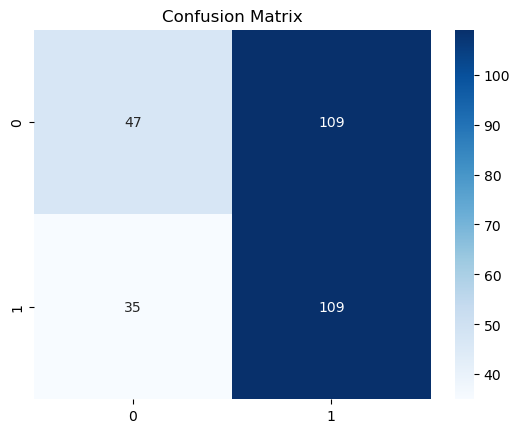

ROC AUC Score: 0.5746527777777777


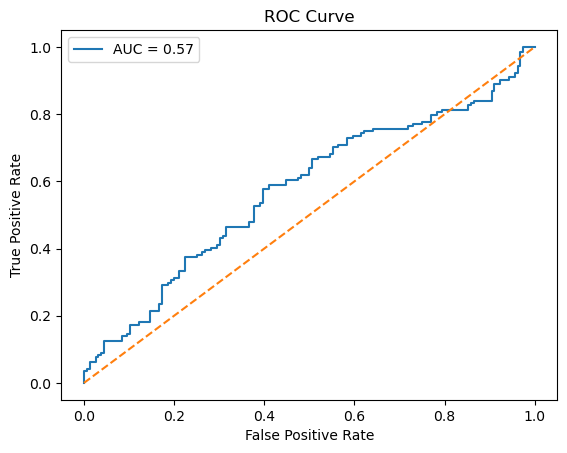

In [ ]:
# Predict on test data
y_pred = best_rf_model.predict(X_test)

# Evaluation metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC AUC score and curve
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Deployment with Streamlit
**a. Create a Streamlit App**
**Steps to Run Streamlit App Locally**
** 1. Install Streamlit** (if not already installed): Open your terminal or command prompt and run the following command: pip install streamlit

**2. Create a Python Script**:
- Open a text editor or IDE (such as VS Code, PyCharm, or Jupyter Notebook).
- Save the Streamlit app code to a file, for example, app.py.

**3. Add Streamlit App Code**
**4. Run the Streamlit App**: Open a terminal or command prompt in the directory where your app.py file is located, and type the following command: streamlit run app.py

**5. Access the App**: After running the above command, your default web browser should automatically open with the Streamlit app running. If not, you'll see a URL in the terminal (usually http://localhost:8501), which you can open manually in your browser.

**6. Interacting with the App**: You can now input data into the app to predict Email Marketing based on the model you built